In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from scipy import stats
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import plotly.express as px
from plotly.subplots import make_subplots
py.offline.init_notebook_mode(connected=True)
stopwords = set(stopwords.words('english'))



In [3]:
wsb_df = pd.read_csv('Clean_WSB.csv')




### Convert timestamp to datetime ### 
wsb_df['timestamp'] = wsb_df['timestamp'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wsb_df['title'] = wsb_df['title'].astype(str)
wsb_df['date'] = wsb_df['timestamp'].apply(lambda x: x.date())
wsb_df['date_hour'] = wsb_df['timestamp'].apply(lambda x: f"{x.date()} {x.hour}:00:00")
wsb_df['date_hour'] = wsb_df['date_hour'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))




### apply RE to remove emojis, punc., stopwords; explode title for easy groupby counting ###
wsb_df['title'] = wsb_df['title'].map(lambda x: re.sub(r"[^A-Za-z ]", '', x))
wsb_df['title'] = wsb_df['title'].map(lambda x: x.lower().split(' '))

wsb_df_explode = wsb_df.explode('title')

wsb_df_explode =  wsb_df_explode[ ~wsb_df_explode['title'].isin(stopwords)]


### narrow specific securities ###
wsb_full = wsb_df_explode.replace({'gamestop': 'gme', 'nokia': 'nok', 'dogecoin': 'doge', 
                                         'bitcoin': 'btc', 'amazon': 'amzn', 'microsft': 'msft',
                                         'tesla': 'tsla', 'indexsp': 'sp500', '500': 'sp500', 'sp': 'sp500'})

wsb_full

,Unnamed: 0,title,author,scores,comments,timestamp,date,date_hour
0,0,whats,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
0,0,going,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
0,0,pltr,Zaccko98,1,2,2021-02-16 04:53:12,2021-02-16,2021-02-16 04:00:00
1,1,need,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 04:00:00
1,1,explanations,toutoucnc,1,2,2021-02-16 04:53:09,2021-02-16,2021-02-16 04:00:00
...,...,...,...,...,...,...,...,...
572905,579472,hear,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 16:00:00
572905,579472,f,cheaptissueburlap,1,0,2020-12-31 16:21:52,2020-12-31,2020-12-31 16:00:00
572906,579473,ive,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 16:00:00
572906,579473,waiting,1A9D6,1,6,2020-12-31 16:21:36,2020-12-31,2020-12-31 16:00:00


In [4]:
wsb_df_groupby = wsb_full.groupby(['title']).count().reset_index()
wallstreetbets = wsb_df_groupby.sort_values('author', ascending = False)

wallstreetbets = wallstreetbets.drop(0)
wallstreetbets = wallstreetbets.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp', 'date'], axis =1)
wallstreetbets = wallstreetbets.rename(columns = {'title':'title','date_hour': 'count'})
wallstreetbets.head(30)

,title,count
27920,gme,102785
2081,amc,45965
9990,buy,45884
31969,hold,38734
58782,robinhood,29909
44758,moon,26679
35011,im,24674
66239,stock,23792
47379,nok,20994
40163,like,17808


In [5]:
### Big movers: GME, NOK, AMC, Dogecoin ### 
### Other popular stocks: bitcoin, AMZN, MSFT, TSLA ###
### Also SMP 500 and stock indexes. ###


gme = wallstreetbets[wallstreetbets['title'] == 'gme']
nok = wallstreetbets[wallstreetbets['title'] == 'nok']
amc = wallstreetbets[wallstreetbets['title'] == 'amc']
doge = wallstreetbets[wallstreetbets['title'] == 'doge']
btc = wallstreetbets[wallstreetbets['title'] == 'btc']
amzn = wallstreetbets[wallstreetbets['title'] == 'amzn']
msft = wallstreetbets[wallstreetbets['title'] == 'msft']
tsla = wallstreetbets[wallstreetbets['title'] == 'tsla']
sp500= (wallstreetbets['title'] == 'sp500')


stonks = wallstreetbets[(wallstreetbets['title'] == 'gme') | (wallstreetbets['title'] == 'nok') | 
                       (wallstreetbets['title'] == 'amc') | (wallstreetbets['title'] == 'doge') | 
                       (wallstreetbets['title'] == 'btc') | (wallstreetbets['title'] == 'amzn') |
                       (wallstreetbets['title'] == 'msft')| (wallstreetbets['title'] == 'tsla') |
                       (wallstreetbets['title'] == 'sp500')].sort_values('count', ascending = True)
stonks

,title,count
64721,sp500,30
45554,msft,44
2552,amzn,619
9386,btc,1578
72136,tsla,2717
18968,doge,15703
47379,nok,20994
2081,amc,45965
27920,gme,102785


Text(0, 0.5, 'Securities')

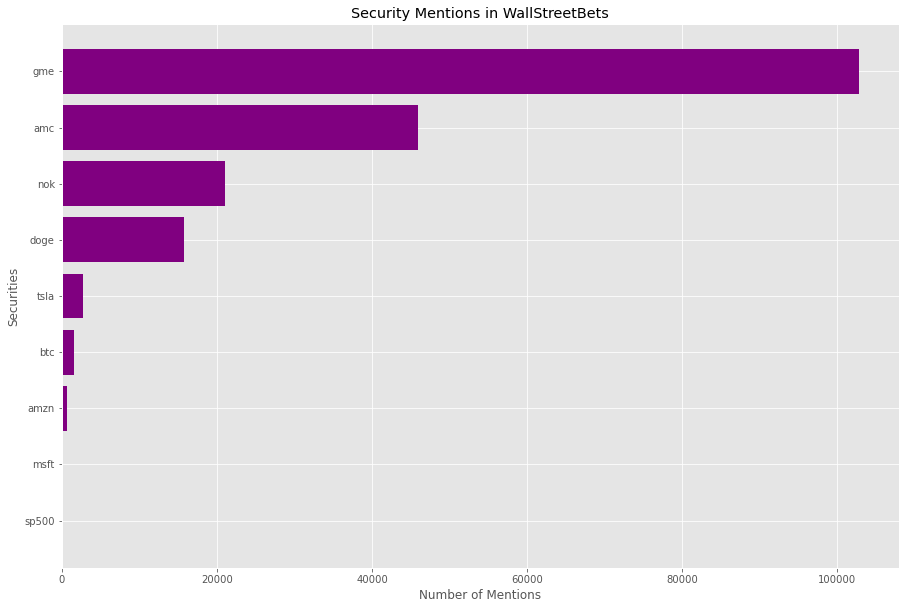

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
x = stonks['title']
y = stonks['count']
ax.barh(x,y, color='purple')
ax.set_title('Security Mentions in WallStreetBets')
ax.set_xlabel('Number of Mentions')
ax.set_ylabel('Securities')

In [91]:
fig = px.bar(stonks, x='count', y='title', title='Mentions in WSB', 
             orientation = 'h', labels = {
                 'title': 'Securities',
                 'count': 'Number of Mentions'})


fig.show()
fig.write_html("html/Mentions in WSB.html")

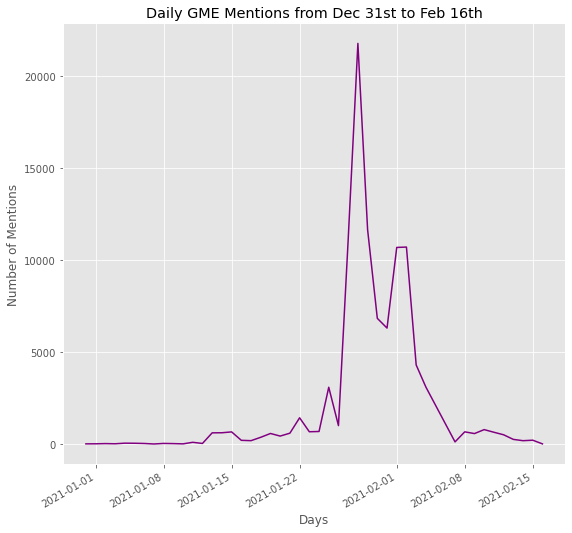

In [77]:
gme_date = wsb_full.groupby(['title','date']).count().reset_index()
gme_date = gme_date[gme_date['title'] == 'gme']

gme_date = gme_date.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_date = gme_date.rename(columns = {'title':'title','date' : 'date', 'date_hour': 'count'})


x = gme_date['date']
y = gme_date['count']

fig, ax = plt.subplots(figsize = (9,9))
ax.plot(x,y, color = 'purple')
ax.set_title('Daily GME Mentions from Dec 31st to Feb 16th')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Mentions')
fig.autofmt_xdate()


In [81]:
fig = px.line(gme_date, x='date', y='count', title='Daily GME mentions')

fig.update_xaxes(rangeslider_visible=True)
fig.show()
fig.write_html("html/Daily GME Mentions.html")

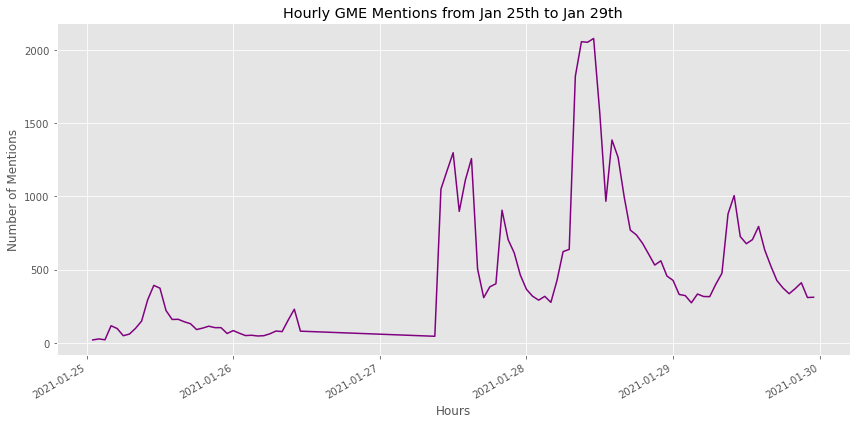

In [92]:
jan_25 = datetime.strptime('2021-01-25 00:00:00', "%Y-%m-%d %H:%M:%S")
jan_29 = datetime.strptime('2021-01-29 23:00:00', "%Y-%m-%d %H:%M:%S")

gme_hour = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_hour = gme_hour[(gme_hour['title'] == 'gme') & (gme_hour['date_hour'] > jan_25)&
                    (gme_hour['date_hour'] <= jan_29)]


gme_hour = gme_hour.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_hour = gme_hour.rename(columns = {'title':'title','date_hour' : 'date', 'date': 'count'})


x = gme_hour['date']
y = gme_hour['count']

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x,y, color = 'purple')
ax.set_title('Hourly GME Mentions from Jan 25th to Jan 29th')
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Mentions')
fig.autofmt_xdate()
fig.tight_layout()


In [95]:
fig = px.line(gme_hour, x='date', y='count', title='Hourly GME Mentions - Jan 25th to Jan 29th',
             labels = {
                 'date':'Hours',
                 'count':'Mentions'
             })

fig.update_xaxes(rangeslider_visible=True)
fig.show()
fig.write_html("html/Hourly GME Mentions.html")

In [9]:
### Use alpha vantage to gather daily and hourly stock data ###


from alpha_vantage.timeseries import TimeSeries

API_key = 'OZHBQ2Q48QC0NFRZ'

ts = TimeSeries(key = API_key,output_format='pandas')
data = ts.get_daily_adjusted('GME')
gme = data[0].reset_index()
gme_daily = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_daily.to_csv('gme_daily_prices')
gme_daily=gme_daily.sort_values('date', ascending=True)
gme_daily['percent change'] = gme_daily['4. close'].pct_change()



data = ts.get_intraday('GME', interval = '60min', outputsize='full')
gme = data[0].reset_index()
gme_hourly_full = gme[(gme['date'] >= '2020-12-31') & (gme['date'] <= '2021-02-16')]
gme_hourly_full = gme_hourly_full.sort_values('date', ascending=True)

gme_hourly = gme[(gme['date'] >= '2021-01-25') & (gme['date'] <= '2021-01-29')]
gme_hourly = gme_hourly.sort_values('date', ascending=True)
gme_hourly['percent change'] = gme_hourly['4. close'].pct_change()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,percent change
35,2020-12-31,19.25,19.8000,18.8000,18.84,18.84,6922652.0,0.0,1.0,NaN
34,2021-01-04,19.00,19.1000,17.1500,17.25,17.25,10022474.0,0.0,1.0,-0.084395
33,2021-01-05,17.35,18.0765,17.2300,17.37,17.37,4961457.0,0.0,1.0,0.006957
32,2021-01-06,17.34,18.9800,17.3300,18.36,18.36,6056248.0,0.0,1.0,0.056995
31,2021-01-07,18.47,19.4500,18.0200,18.08,18.08,6129276.0,0.0,1.0,-0.015251
30,2021-01-08,18.18,18.3000,17.0800,17.69,17.69,6481960.0,0.0,1.0,-0.021571
29,2021-01-11,19.41,20.6500,19.0100,19.94,19.94,14927612.0,0.0,1.0,0.127191
28,2021-01-12,19.96,20.4000,19.3168,19.95,19.95,6999775.0,0.0,1.0,0.000502
27,2021-01-13,20.42,38.6500,20.0300,31.40,31.40,143530129.0,0.0,1.0,0.573935
26,2021-01-14,38.09,43.0600,33.0500,39.91,39.91,93717410.0,0.0,1.0,0.271019


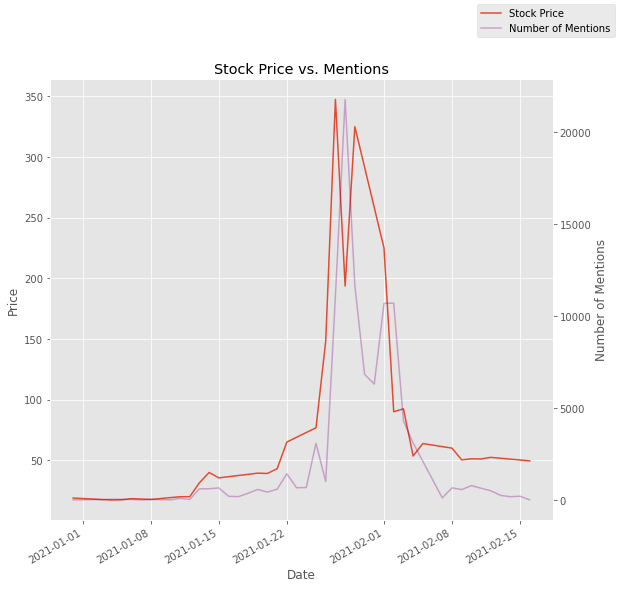

In [112]:
### Plot stock prices over mentions ###


fig, ax1 = plt.subplots(figsize = (9,9))
ax2 = ax1.twinx()


ax1.plot(gme_daily['date'], gme_daily['5. adjusted close'], label = 'Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock Price vs. Mentions')


x = gme_date['date']
y = gme_date['count']

ax2.plot(x,y, color = 'purple', label = 'Number of Mentions', alpha = .3)
ax2.grid(b=False)
ax2.set_ylabel('Number of Mentions')


fig.autofmt_xdate()
fig.legend()

gme_daily

In [122]:

fig = go.Figure(data=[go.Candlestick(x=gme_daily['date'],
                open=gme_daily['1. open'],
                high=gme_daily['2. high'],
                low=gme_daily['3. low'],
                close=gme_daily['4. close'])])


fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
fig.write_html('candlestick daily.html')

In [104]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gme_daily['date'], y=gme_daily['5. adjusted close'],
               name="Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( x=gme_date['date'], y=gme_date['count'], name= 'Mentions'),
    secondary_y=True,
)
fig.update_layout(
    title_text="GME Price vs. Mentions"
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Mentions", secondary_y=True)

fig.show()
fig.write_html('html/GME Price vs. Mentions.html')

,title,date,count
328310,gme,2021-01-25 01:00:00,19
328311,gme,2021-01-25 02:00:00,26
328312,gme,2021-01-25 03:00:00,20
328313,gme,2021-01-25 04:00:00,116
328314,gme,2021-01-25 05:00:00,97
...,...,...,...
328403,gme,2021-01-29 19:00:00,335
328404,gme,2021-01-29 20:00:00,370
328405,gme,2021-01-29 21:00:00,410
328406,gme,2021-01-29 22:00:00,309


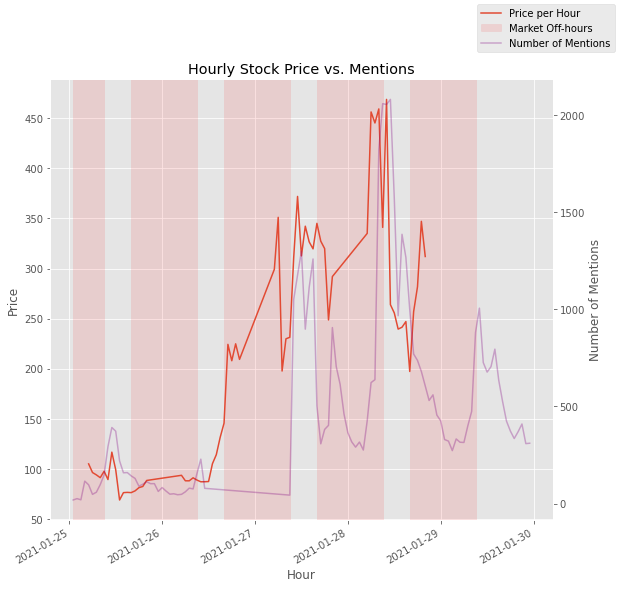

In [11]:
fig, ax1 = plt.subplots(figsize = (9,9))
ax2 = ax1.twinx()

ax1.plot(gme_hourly['date'], gme_hourly['4. close'], label = 'Price per Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Price')
ax1.set_title('Hourly Stock Price vs. Mentions')
ax1.axvspan('2021-01-25 01:00:00', '2021-01-25 09:00:00', color='red', alpha=0.1, label='Market Off-hours')
ax1.axvspan('2021-01-25 16:00:00', '2021-01-26 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-26 16:00:00', '2021-01-27 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-27 16:00:00', '2021-01-28 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-28 16:00:00', '2021-01-29 09:00:00', color='red', alpha=0.1)

x = gme_hour['date']
y = gme_hour['count']

ax2.plot(x,y, color = 'purple', label = 'Number of Mentions', alpha=.3)
ax2.grid(b=False)
ax2.set_ylabel('Number of Mentions')


fig.autofmt_xdate()
fig.legend()
gme_hour

In [105]:

# ax1.plot(gme_hourly['date'], gme_hourly['4. close'], label = 'Price per Hour')
# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Price')
# ax1.set_title('Hourly Stock Price vs. Mentions')
# ax1.axvspan('2021-01-25 01:00:00', '2021-01-25 09:00:00', color='red', alpha=0.1, label='Market Off-hours')
# ax1.axvspan('2021-01-25 16:00:00', '2021-01-26 09:00:00', color='red', alpha=0.1)
# ax1.axvspan('2021-01-26 16:00:00', '2021-01-27 09:00:00', color='red', alpha=0.1)
# ax1.axvspan('2021-01-27 16:00:00', '2021-01-28 09:00:00', color='red', alpha=0.1)
# ax1.axvspan('2021-01-28 16:00:00', '2021-01-29 09:00:00', color='red', alpha=0.1)

# x = gme_hour['date']
# y = gme_hour['count']

# ax2.plot(x,y, color = 'purple', label = 'Number of Mentions', alpha=.3)
# ax2.grid(b=False)
# ax2.set_ylabel('Number of Mentions')


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gme_hourly['date'], y=gme_hourly['4. close'],
               name="Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( x=gme_hour['date'], y=gme_hour['count'], name= 'Mentions'),
    secondary_y=True,
)
fig.update_layout(
    title_text="GME Hourly Price vs. Mentions"
)

fig.update_xaxes(title_text="Hour")

fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Mentions", secondary_y=True)

fig.show()
fig.write_html('html/GME Hourly Price vs. Mentions.html')

,date,1. open,2. high,3. low,4. close,5. volume,percent change
335,2021-01-25 05:00:00,72.5000,136.6300,72.2000,105.39,1194735.0,NaN
334,2021-01-25 06:00:00,106.7700,109.0000,86.2500,96.77,885972.0,-0.081791
333,2021-01-25 07:00:00,96.9300,101.7000,90.3500,94.43,784325.0,-0.024181
332,2021-01-25 08:00:00,94.4800,97.0000,86.7200,91.65,2187519.0,-0.029440
331,2021-01-25 09:00:00,91.7100,104.5300,86.9999,98.05,4674120.0,0.069831
...,...,...,...,...,...,...,...
276,2021-01-28 16:00:00,246.1359,261.9899,197.4400,197.44,5687714.0,-0.201198
275,2021-01-28 17:00:00,197.4400,282.9200,193.6000,257.00,1543357.0,0.301661
274,2021-01-28 18:00:00,257.0000,509.0000,255.0000,281.85,418746.0,0.096693
273,2021-01-28 19:00:00,280.3300,348.8600,280.3300,347.01,1106541.0,0.231187


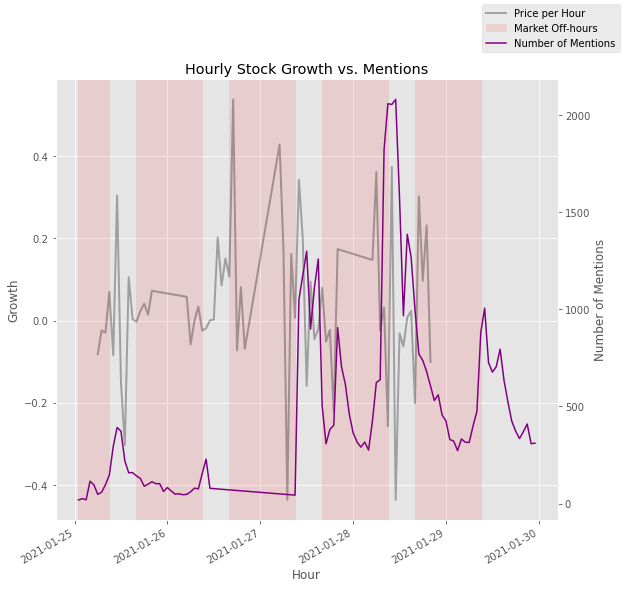

In [123]:
fig, ax1 = plt.subplots(figsize = (9,9))
ax2 = ax1.twinx()

ax1.plot(gme_hourly['date'], gme_hourly['percent change'], color = 'black',
         label = 'Price per Hour', linewidth=2, alpha = .3)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Growth')
ax1.set_title('Hourly Stock Growth vs. Mentions')
ax1.axvspan('2021-01-25 01:00:00', '2021-01-25 09:00:00', color='red', alpha=0.1, label='Market Off-hours')
ax1.axvspan('2021-01-25 16:00:00', '2021-01-26 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-26 16:00:00', '2021-01-27 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-27 16:00:00', '2021-01-28 09:00:00', color='red', alpha=0.1)
ax1.axvspan('2021-01-28 16:00:00', '2021-01-29 09:00:00', color='red', alpha=0.1)

x = gme_hour['date']
y = gme_hour['count']

ax2.plot(x,y, color = 'purple', label = 'Number of Mentions')
ax2.grid(b=False)
ax2.set_ylabel('Number of Mentions')


fig.autofmt_xdate()
fig.legend()
gme_hourly

In [125]:
### Run hypothesis test. ###
### H0: The number of mentions of a stock on WSB in the first 1-1/2 hours of trading DOES NOT influence the stock growth ###
### H1: The number of mentions of a stock on WSB in the first 1-1/2 hours of trading DOES influence the stock growth ###
### Stock growth == open-close/open   of a trading day. ###
gme_hour_full = wsb_full.groupby(['title','date_hour']).count().reset_index()
gme_hour_full = gme_hour_full[(gme_hour_full['title'] == 'gme') & (gme_hour_full['date_hour'] > '2020-12-31 01:00:00')&
                    (gme_hour_full['date_hour'] <= '2021-02-16 23:00:00')]
gme_hour_full = gme_hour_full.drop(['Unnamed: 0','author', 'scores',
                                     'comments', 'timestamp'], axis =1)
gme_hour_full = gme_hour_full.rename(columns = {'title':'title','date_hour' : 'date', 'date': 'count'})


left = gme_hourly_full.set_index('date')
right = gme_hour_full.set_index('date')
gmefull=left.join(right).reset_index()
gmefull['count'] = gmefull['count'].fillna(0)
gmefull['percent change'] = (gmefull['4. close'] - gmefull['1. open'])/gmefull['1. open']
gmefull['time'] = gmefull['date'].apply(lambda x: datetime.time(x)).astype(str)
gmefull['day'] = gmefull['date'].apply(lambda x: datetime.date(x)).astype(str)

first_hours = gmefull[(gmefull['time'] == '08:00:00') | ((gmefull['time'] == '09:00:00'))]

first_hours = first_hours.groupby('day').sum()
first_hours = first_hours[['count']]


growth = gmefull.groupby('day').sum()[['percent change']]

growth_vs_hr = first_hours.join(growth)
sorted_corr = growth_vs_hr.sort_values('count')
gmefull


,date,1. open,2. high,3. low,4. close,5. volume,title,count,percent change,time,day
0,2020-12-31 05:00:00,19.80,19.8000,19.8000,19.80,421.0,NaN,0.0,0.000000,05:00:00,2020-12-31
1,2020-12-31 06:00:00,19.80,19.8000,19.8000,19.80,527.0,NaN,0.0,0.000000,06:00:00,2020-12-31
2,2020-12-31 07:00:00,19.52,19.5600,19.5200,19.55,385.0,NaN,0.0,0.001537,07:00:00,2020-12-31
3,2020-12-31 08:00:00,19.52,19.5500,19.2700,19.30,3682.0,NaN,0.0,-0.011270,08:00:00,2020-12-31
4,2020-12-31 09:00:00,19.40,19.4993,19.3000,19.36,10620.0,NaN,0.0,-0.002062,09:00:00,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...
467,2021-02-12 16:00:00,51.34,52.4500,51.1700,52.33,1575850.0,gme,28.0,0.019283,16:00:00,2021-02-12
468,2021-02-12 17:00:00,52.40,52.4000,51.2500,51.90,64781.0,gme,17.0,-0.009542,17:00:00,2021-02-12
469,2021-02-12 18:00:00,51.94,52.2000,51.7500,51.75,35990.0,gme,19.0,-0.003658,18:00:00,2021-02-12
470,2021-02-12 19:00:00,51.71,52.6000,51.6201,52.60,19107.0,gme,12.0,0.017211,19:00:00,2021-02-12


In [126]:
fig = px.bar(gmefull, x='date', y="percent change", 
             title='Percent GME Change',
             labels = {
                 'date':'Date',
                 'count':'Percent Change'})
fig.show()
fig.write_html('html/Percent GME Change.html')

In [23]:
s_corr = stats.spearmanr(growth_vs_hr['count'], growth_vs_hr['percent change'])
s_corr


SpearmanrResult(correlation=-0.0877017386768316, pvalue=0.6449129625582433)

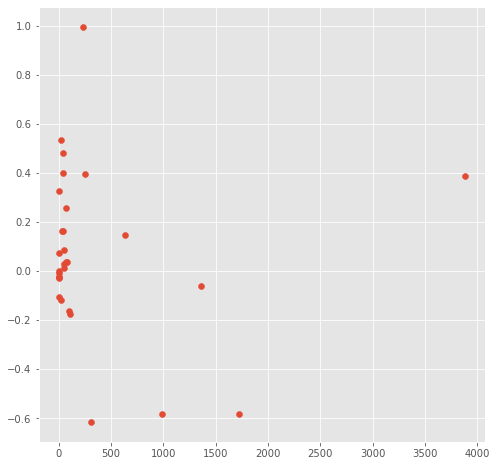

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(growth_vs_hr['count'], growth_vs_hr['percent change'])

In [65]:
### I cannot reject the null hypothesis. ###
### The amount of mentions in the morning does not gave a positive or negative impact on the closing price of a stock###
### HO: The number of mentions in the last two hours of trading has no influence of opening prices. ###
### H1: The number of mentions in the last two hours of trading influences the opening price next day ###

last_hours = gmefull[(gmefull['time'] == '14:00:00') | ((gmefull['time'] == '16:00:00'))]

last_hours = last_hours.groupby('day').sum()
last_hours = last_hours[['count']]


gme_daily_shifted = gme_daily[['date' , '1. open', '4. close' ]]
gme_daily_shifted['4. close'] = gme_daily_shifted['4. close'].shift(periods = 1)
gme_daily_shifted['percent change'] = (gme_daily_shifted['1. open'] - gme_daily_shifted['4. close']) / gme_daily_shifted['4. close']
gme_daily_shifted = gme_daily_shifted.rename(columns = {'date':'day'}).astype(str).set_index('day')
gme_daily_shifted


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1. open,4. close,percent change
day,,,
2020-12-31,19.25,nan,nan
2021-01-04,19.0,18.84,0.008492569002123149
2021-01-05,17.35,17.25,0.005797101449275445
2021-01-06,17.34,17.37,-0.0017271157167530879
2021-01-07,18.47,18.36,0.005991285403050078
2021-01-08,18.18,18.08,0.0055309734513275125
2021-01-11,19.41,17.69,0.09723007348784617
2021-01-12,19.96,19.94,0.0010030090270812223
2021-01-13,20.42,19.95,0.02355889724310789


In [66]:
gme_daily_joined = last_hours.join(gme_daily_shifted, how='left')
s_corr2 = stats.spearmanr(gme_daily_joined['count'], gme_daily_joined['percent change'])
s_corr2

### THe p-value HEAVILY states that we cannot reject the null-hypothesis ### 

SpearmanrResult(correlation=-0.0035603027138667903, pvalue=0.9851027762191317)